<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Projeto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = black> **Projeto Módulo 05 - Grupo 04**
###<font color = black>**Data Analytics - Turma 12 - Resilia**



# **<font color = #87CEEB > Análise exploratória relacionada a Cota para o Exercício da Atividade Parlamentar dos anos de 2019, 2020 e 2021**

###<font color = orange> **Fonte de Dados Utilizada:** 

*   Site oficial da câmara dos deputados - [Portal](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)
*   Base de Dados CEAP referente aos anos de 2019, 2020 e 2021.


#<font color = #87CEEB> **1. O que é CEAP?**

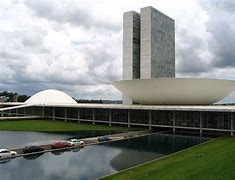


A Cota para o Exercício da Atividade Parlamentar (CEAP), instituída pelo Ato da Mesa n. 43/2009, destina-se a custear gastos exclusivamente vinculados ao exercício do mandato, observados os limites mensais estabelecidos de acordo com o estado de origem do parlamentar, atendendo uma série de despesas, entre elas:

I - passagens aéreas;

II - telefonia;

III - serviços e produtos postais previstos nos contratos firmados pela Câmara dos Deputados, vedada a aquisição de selos e a aquisição e remessa de cartões postais;

IV - manutenção de escritórios de apoio à atividade parlamentar, compreendendo: locação de imóveis; condomínio; IPTU e seguro contra incêndio; serviços de energia elétrica, água e esgoto; locação de móveis e equipamentos; material de expediente e suprimentos de informática; acesso à internet; assinatura de TV a cabo ou similar; locação ou aquisição de licença de uso de software;

V - assinatura de publicações;

VI - fornecimento de alimentação do parlamentar;

VII - hospedagem, exceto do parlamentar no Distrito Federal;

VIII - outras despesas com locomoção, contemplando: locação ou fretamento de aeronaves; locação ou fretamento de veículos automotores, locação ou fretamento de embarcações; serviço de táxi, pedágio e estacionamento, passagens terrestres, marítimas ou fluviais;

IX - combustíveis e lubrificantes, até o limite inacumulável de R$ 6.000,00 (seis mil reais) mensais;

X - serviços de segurança prestados por empresa especializada, até o limite inacumulável de R$ 8.700,00 (oito mil e setecentos reais) mensais;

XI - contratação, para fins de apoio ao exercício do mandato parlamentar, de consultorias e trabalhos técnicos, permitidas pesquisas socioeconômicas;

XII - divulgação da sua atividade parlamentar, exceto nos 120 (cento e vinte) dias anteriores à data das eleições de âmbito federal, estadual ou municipal, salvo se o deputado não for candidato à eleição.

XIII - participação do parlamentar em cursos, palestras, seminários, simpósios, congressos ou eventos congêneres, realizados por instituição especializada, até o limite mensal inacumulável correspondente a 25% (vinte e cinco por cento) do valor da menor cota mensal fixada no Anexo do Ato da Mesa nº 43/2009;

XIV - complementação do auxílio-moradia de que trata o Ato da Mesa n. 104/88, até o limite inacumulável de R$1.747,00 (um mil, setecentos e quarenta e sete reais) mensais.

Fonte: https://www2.camara.leg.br/comunicacao/camara-noticias/camara-destaca/56a-legislatura/no-exercicio-do-mandato/cota-para-o-exercicio-da-atividade-parlamentar-ceap



## IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [ ]:
import pandas as pd #para ler, visualizar e printar infos do df
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np #numpy para auxiliar na análise
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import json
from urllib.request import urlopen
import plotly.graph_objects as go
import plotly as pt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2019

In [ ]:
dfparlamentar = pd.read_csv('/content/drive/My Drive/Ano-2019.csv', sep = ';')
dfparlamentar

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,212625.0,548.0,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,...,2019,0,Dr. Gonçalo,BSB/THE,0,0.0,NaN,3463,1722569,NaN
288988,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2019,0,NaN,NaN,1686035,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
288989,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,NaN,NaN,1667677,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
288990,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,10,TELEFONIA,...,2019,0,NaN,NaN,0,0.0,NaN,3465,0,NaN


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2020

In [ ]:
 dfparlamentar20 = pd.read_csv('/content/drive/My Drive/Ano-2020.csv', sep = ';')
 dfparlamentar20

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160898,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,NVT/CGH/BSB,0,0.0,NaN,3473,18850,NaN
160899,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,ANA PAULA KANNENBERG HARTMANN,BSB/GRU/NVT,0,0.0,NaN,3473,19540,NaN
160900,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,NVT/GRU/BSB,0,0.0,NaN,3473,19738,NaN
160901,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,CGH/NVT,0,0.0,NaN,3473,20193,NaN


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2021

In [ ]:
 DFparlamentar21 = pd.read_csv('/content/drive/My Drive/Ano-2021.csv', sep = ';')
 DFparlamentar21

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1751471,NaN,NaN,3453,7165735,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1752542,NaN,NaN,3453,7167891,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1753004,NaN,NaN,3453,7168798,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1758032,NaN,NaN,3453,7178054,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1760213,NaN,NaN,3453,7183245,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


Agora, vamos buscar mais informações dos dataframes acima:

## Verificando a porcentagem de nulos por coluna

In [ ]:
(dfparlamentar.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.999166
txtDescricaoEspecificacao    0.775893
txtTrecho                    0.705148
txtPassageiro                0.702698
numRessarcimento             0.614166
urlDocumento                 0.419482
datEmissao                   0.021357
txtCNPJCPF                   0.012796
cpf                          0.003471
ideCadastro                  0.003132
nuCarteiraParlamentar        0.003132
sgUF                         0.003132
sgPartido                    0.003132
txtFornecedor                0.000052
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [ ]:
(dfparlamentar20.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.556420
txtTrecho                    0.456808
txtPassageiro                0.456016
txtDescricaoEspecificacao    0.418624
numRessarcimento             0.400672
urlDocumento                 0.188434
txtCNPJCPF                   0.040406
datEmissao                   0.020471
cpf                          0.001356
ideCadastro                  0.001356
nuCarteiraParlamentar        0.001356
sgUF                         0.001356
sgPartido                    0.001356
txtFornecedor                0.000062
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [ ]:
(DFparlamentar21.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.365353
txtTrecho                    0.315850
txtPassageiro                0.315400
numRessarcimento             0.281593
txtDescricaoEspecificacao    0.256467
urlDocumento                 0.104425
txtCNPJCPF                   0.029118
datEmissao                   0.012326
sgPartido                    0.001536
sgUF                         0.001536
nuCarteiraParlamentar        0.001536
ideCadastro                  0.001536
cpf                          0.001536
nuDeputadoId                 0.000000
numMes                       0.000000
numLote                      0.000000
ideDocumento                 0.000000
numParcela                   0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
txtFornecedor                0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

VERIFICANDO OS TIPOS DE DADOS PRESENTES NAS COLUNAS

In [ ]:
display(dfparlamentar.dtypes)
display(dfparlamentar20.dtypes)
display(DFparlamentar21.dtypes)

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

PODEMOS OBSERVAR QUE OS DATAFRAMES POSSUEM OS MESMOS TIPOS DE DADOS NAS MESMAS COLUNAS ISSO OS TORNA COMPATÍVEIS E NOS PERMITE UNI-LOS PARA FAZER UMA LIMPEZA MAIS PRECISA E OBJETIVA

In [ ]:
dfparlamentarcompleto2 = pd.concat([dfparlamentar ,dfparlamentar20 ,DFparlamentar21])

In [ ]:
dfparlamentarcompleto1 = pd.concat([dfparlamentar ,dfparlamentar20 ,DFparlamentar21])
dfparlamentarcompleto1

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


FAZENDO A VERIFICAÇÃO DE COLUNAS E POSSÍVEIS ERROS

In [ ]:
dfparlamentarcompleto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

Todos os dataframes possuem o mesmo número de colunas, isso permite utilizar um código com a função drop(retirada) para retirar as colunas que não serão necessárias para a análise

In [ ]:
dfparlamentarcompleto2.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

De acordo com as perguntas solicitadas, vamos manter somente as colunas necessárias para realizar a análise:

In [ ]:
dfparlamentarcompleto2.drop(['ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'codLegislatura',
       'numEspecificacaoSubCota',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'numParcela','numLote',
       'numRessarcimento','nuDeputadoId', 'ideDocumento',
       'urlDocumento'],axis='columns', inplace = True)

In [ ]:
dfparlamentarcompleto = dfparlamentarcompleto2

In [ ]:
dfparlamentarcompleto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   sgUF                       553759 non-null  object 
 3   sgPartido                  553759 non-null  object 
 4   numSubCota                 555500 non-null  int64  
 5   txtDescricao               555500 non-null  object 
 6   txtDescricaoEspecificacao  136177 non-null  object 
 7   datEmissao                 539850 non-null  object 
 8   vlrDocumento               555500 non-null  float64
 9   vlrGlosa                   555500 non-null  float64
 10  vlrLiquido                 555500 non-null  float64
 11  numMes                     555500 non-null  int64  
 12  numAno                     555500 non-null  int64  
 13  txtPassageiro              12

In [ ]:
# Convertendo a coluna "datEmissao" do tipo 'Object' para o tipo 'Datetime'
dfparlamentarcompleto['datEmissao'] = pd.to_datetime(dfparlamentarcompleto['datEmissao'], format = '%Y/%m/%d')

Como foi observado através da função .info(), o formato da coluna 'datEmissao' estava originalmente como do tipo 'Object' e esse formato não permite sua utilização em cálculos envolvendo datas, sendo assim convertido para o tipo 'Datetime'.

In [ ]:
#Filtro da coluna vlLiquido exibindo somente o que for >0.
liq_valor_positivo = dfparlamentarcompleto[dfparlamentarcompleto['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


Depois de concatenar os 3 dataframes e retirar as colunas dispensáveis, ficamos com apenas 16 colunas:

In [ ]:
dfparlamentarcompleto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   txNomeParlamentar          555500 non-null  object        
 1   cpf                        553661 non-null  float64       
 2   sgUF                       553759 non-null  object        
 3   sgPartido                  553759 non-null  object        
 4   numSubCota                 555500 non-null  int64         
 5   txtDescricao               555500 non-null  object        
 6   txtDescricaoEspecificacao  136177 non-null  object        
 7   datEmissao                 539850 non-null  datetime64[ns]
 8   vlrDocumento               555500 non-null  float64       
 9   vlrGlosa                   555500 non-null  float64       
 10  vlrLiquido                 555500 non-null  float64       
 11  numMes                     555500 non-null  int64   

## Organizando os dados Not a Number (NaN)

In [ ]:
sem_partido_sem_uf = dfparlamentarcompleto[dfparlamentarcompleto['sgUF'].isnull()][['txNomeParlamentar', 'sgUF', 'sgPartido','vlrLiquido']]
sem_partido_sem_uf

,txNomeParlamentar,sgUF,sgPartido,vlrLiquido
0,LID.GOV-CD,NaN,NaN,111.30
1,LID.GOV-CD,NaN,NaN,117.19
2,LID.GOV-CD,NaN,NaN,120.15
3,LID.GOV-CD,NaN,NaN,151.18
4,LID.GOV-CD,NaN,NaN,119.90
...,...,...,...,...
439,LIDMIN,NaN,NaN,4000.00
440,LIDMIN,NaN,NaN,137.97
441,LIDMIN,NaN,NaN,175.18
442,LIDMIN,NaN,NaN,3800.00


##Atribuindo os partidos correspondentes as despesas relacionadas apenas às lideranças

In [ ]:
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', dfparlamentarcompleto.sgPartido) 
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'SOCIAL', dfparlamentarcompleto.sgPartido)

In [ ]:
dfparlamentarcompleto

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


In [ ]:
parlamentar = dfparlamentarcompleto
parlamentar

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


In [ ]:
parlamentar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   txNomeParlamentar          555500 non-null  object        
 1   cpf                        553661 non-null  float64       
 2   sgUF                       553759 non-null  object        
 3   sgPartido                  555418 non-null  object        
 4   numSubCota                 555500 non-null  int64         
 5   txtDescricao               555500 non-null  object        
 6   txtDescricaoEspecificacao  136177 non-null  object        
 7   datEmissao                 539850 non-null  datetime64[ns]
 8   vlrDocumento               555500 non-null  float64       
 9   vlrGlosa                   555500 non-null  float64       
 10  vlrLiquido                 555500 non-null  float64       
 11  numMes                     555500 non-null  int64   

In [ ]:
parlamentar.count()

txNomeParlamentar            555500
cpf                          553661
sgUF                         553759
sgPartido                    555418
numSubCota                   555500
txtDescricao                 555500
txtDescricaoEspecificacao    136177
datEmissao                   539850
vlrDocumento                 555500
vlrGlosa                     555500
vlrLiquido                   555500
numMes                       555500
numAno                       555500
txtPassageiro                129493
txtTrecho                    128426
vlrRestituicao                  364
dtype: int64

In [ ]:
parlamentar = dfparlamentar[['txNomeParlamentar', 'sgUF']]
parlamentar

,txNomeParlamentar,sgUF
0,LID.GOV-CD,NaN
1,LID.GOV-CD,NaN
2,LID.GOV-CD,NaN
3,LID.GOV-CD,NaN
4,LID.GOV-CD,NaN
...,...,...
288987,Dr. Gonçalo,MA
288988,Marcão Gomes,RJ
288989,Marcão Gomes,RJ
288990,Marcão Gomes,RJ


In [ ]:
parlamentardropado = dfparlamentar.drop_duplicates()
parlamentardropado

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,212625.0,548.0,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,...,2019,0,Dr. Gonçalo,BSB/THE,0,0.0,NaN,3463,1722569,NaN
288988,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2019,0,NaN,NaN,1686035,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
288989,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,NaN,NaN,1667677,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
288990,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,10,TELEFONIA,...,2019,0,NaN,NaN,0,0.0,NaN,3465,0,NaN


In [ ]:
dfparlamentarcompleto1[['txNomeParlamentar','sgUF']]
dfparlamentarcompleto1

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


##Eliminamos todos os nomes duplicados da coluna txNomeParlamentar utilizando o .drop_duplicate().

In [ ]:
parlamentar = dfparlamentarcompleto.drop_duplicates()
parlamentar

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


## Análise Exploratória para a resolução das questões predefinidas:

### Nesta seção, consta a resolução das questões solicitadas para a atividade de análise exploratória dos gastos parlamentares. <p> As questões podem também ser conferidas na rubrica da atividade.</p>
<hr>

**Questões:**
1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?
2. Qual a média de gastos por parlamentar?
3. Quais foram os parlamentares que mais e que menos consumiram
recursos?
4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?
5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?
6. Qual a média de gastos por estado?
7. Qual é o valor total de gastos por estado?
8. Quais estados têm maior número de representantes?
9. Há alguma correlação entre a quantidade de parlamentares por
estado e o valor total dos gastos?
10. Qual a média de gastos por partido?
11. Quais são os partidos que mais e que menos consumiram a
cota parlamentar?
12. Há alguma correlação entre a quantidade de parlamentares
por partido e o valor total dos gastos? 
 
**Questões extras:**

13. A média total de gastos parlamentares durante o período analisado
14. O partido que mais teve gastos em viagens
15. A média de gastos de viagens por partido







## 1 - Como se comportam os gastos com cotas parlamentares ao longo do tempo? 
><b>Existe alguma tendência de aumento ou redução desse custo?</b>

><b>Obs.:</b> Utilizado como referência a coluna 'vlrLiquido' conforme discrimina o Dicionário de Dados: 
     <p>O seu conteúdo representa o valor líquido do documento fiscal ou do documento que deu causa à despesa
     e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. <p>É este valor que será 
     debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa
     que a despesa foi franqueada.

## 1.1 - Obtendo as despesas do período (2019 a 2021)

Aqui a opção foi usar o método dt.to_period('M') para agrupar os períodos por mês para facilitar a visualização

In [ ]:
despesas_por_mes = dfparlamentarcompleto.groupby(dfparlamentarcompleto['datEmissao'].dt.to_period('M'))['vlrLiquido'].sum().reset_index()

despesas_por_mes['mes'] = [ '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
             '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']

Obs. para plotar o gráfico o agrupamento por período não foi aceito, então foi criada a coluna mês para identificar o período.

Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?
Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?
Qual a média de gastos por estado?

## 1.2 - Representação gráfica das despesas ao longo do período:

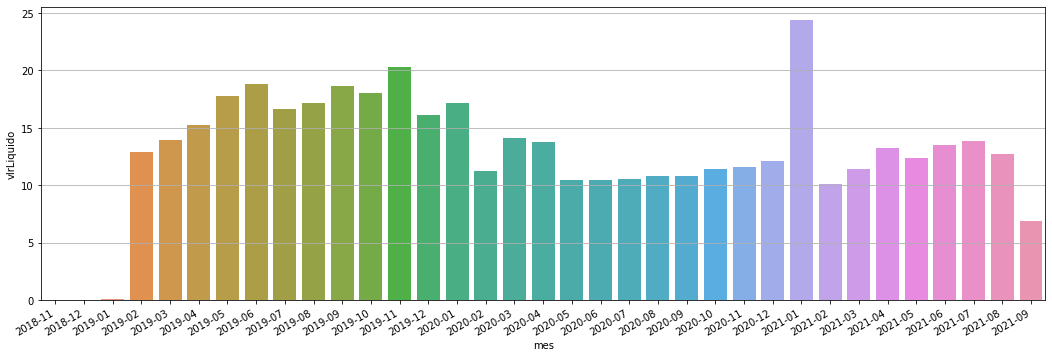

In [ ]:
date = despesas_por_mes['mes']

value = despesas_por_mes["vlrLiquido"] / 1000000

fig, ax = plt.subplots(figsize=(18, 6))

# Adiconando títulos
plt.xlabel("Mês")
plt.ylabel("Valor em milhões de reais")
plt.grid()
# rotacionar das datas
fig.autofmt_xdate()

sns.barplot(x = date, y = value)

<hr>
<a id="q_02"></a>

## 2.0 - Qual a média de gastos por parlamentar?

In [ ]:
# somando o valor total por deputado
a = dfparlamentarcompleto[['txNomeParlamentar', 'vlrLiquido']].drop_duplicates().groupby('txNomeParlamentar').sum().reset_index()

#contando quantos meses cada parlamentar ficou atuante
b = dfparlamentarcompleto[['txNomeParlamentar','numMes','numAno']].drop_duplicates().groupby('txNomeParlamentar').count().reset_index()

# juntando os dados
media_gastos = a.merge(b, left_on='txNomeParlamentar', right_on='txNomeParlamentar')

# criando uma coluna com a média de gastos por mês atuante
media_gastos['media_mes'] = (media_gastos.vlrLiquido / media_gastos.numMes)


media_gastos

,txNomeParlamentar,vlrLiquido,numMes,numAno,media_mes
0,ABEL MESQUITA JR.,45888.19,1,1,45888.190000
1,ADAIL CARNEIRO,42249.14,1,1,42249.140000
2,ADALBERTO CAVALCANTI,37422.25,1,1,37422.250000
3,ADELMO CARNEIRO LEÃO,36059.69,2,2,18029.845000
4,ADELSON BARRETO,20214.53,1,1,20214.530000
...,...,...,...,...,...
841,Zé Silva,479167.89,32,32,14973.996563
842,Zé Vitor,451472.62,31,31,14563.632903
843,Átila Lins,798359.23,32,32,24948.725937
844,Átila Lira,279728.84,31,31,9023.510968


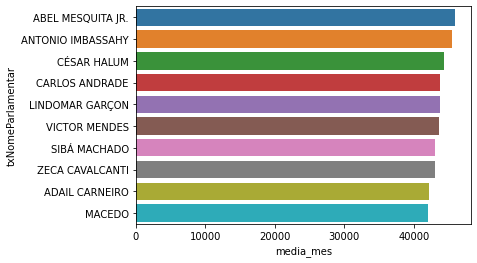

In [ ]:
sns.barplot(x="media_mes", y="txNomeParlamentar", data=media_gastos.sort_values(by='media_mes', ascending=False)[:10])
print()

In [ ]:
desp_media_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).mean().sort_values('vlrLiquido',ascending=False).round(2)

desp_media_parlamentar.rename(columns={'vlrLiquido':'Despesa Média R$'}, inplace=True)

desp_media_parlamentar = desp_media_parlamentar.head()

desp_media_parlamentar.style.format({'Despesa Média R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesa Média R$
txNomeParlamentar,sgPartido,
JOSÉ REINALDO,PSDB,R$ 13452.61
ALBERTO FRAGA,DEM,R$ 10214.52
DELEGADO FRANCISCHINI,PSL,R$ 8975.94
HEULER CRUVINEL,PP,R$ 8881.52
CÉSAR HALUM,PRB,R$ 8865.13


<hr>
<a id="q_03"></a>

## 3 - Quais foram os parlamentares que mais e que menos consumiram recursos?

## 3.1 - Exibindo o Parlamentar que consumiu mais recursos no Período de 2019 a 2021:

In [ ]:
desp_maxima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=False).round(2)

desp_maxima_parlamentar.rename(columns={'vlrLiquido':'Despesas Máximas R$'}, inplace=True)

desp_maxima_parlamentar = desp_maxima_parlamentar.head()

desp_maxima_parlamentar.style.format({'Despesas Máximas R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesas Máximas R$
txNomeParlamentar,sgPartido,
Jéssica Sales,MDB,R$ 1415460.06
Flaviano Melo,MDB,R$ 1331748.68
João Maia,PL,R$ 1331131.21
Wellington Roberto,PL,R$ 1328756.77
Silas Câmara,REPUBLICANOS,R$ 1311577.46


## 3.1.1 - Variante com a maior despesa única de um parlamentar

In [ ]:
desp_maxima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).max().sort_values('vlrLiquido',ascending=False).round(2)

desp_maxima_parlamentar.rename(columns={'vlrLiquido':'Maior Despesa R$'}, inplace=True)

desp_maxima_parlamentar = desp_maxima_parlamentar.head()

desp_maxima_parlamentar.style.format({'Maior Despesa R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Maior Despesa R$
txNomeParlamentar,sgPartido,
Edmilson Rodrigues,PSOL,R$ 151260.00
Weliton Prado,PROS,R$ 145140.00
Rogério Correia,PT,R$ 144640.00
Raimundo Costa,PL,R$ 110000.00
Professora Dorinha Seabra Rezende,DEM,R$ 109500.00


## 3.2 - Exibindo o Parlamentar consumiu menos recursos no Período de 2019 a 2021:

In [ ]:
desp_minima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=True).round(2)

desp_minima_parlamentar.rename(columns={'vlrLiquido':'Despesa Mínima R$'}, inplace=True)

desp_minima_parlamentar = desp_minima_parlamentar.head()

desp_minima_parlamentar.style.format({'Despesa Mínima R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesa Mínima R$
txNomeParlamentar,sgPartido,
Jorge Goetten,PL,R$ -24402.70
Renato Queiroz,MDB,R$ -9107.21
FELIPE BORNIER,PROS,R$ -1675.06
LUCIANA SANTOS,PCdoB,R$ 0.49
MANDETTA,DEM,R$ 0.60


##4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

In [ ]:
Maisonerosas = dfparlamentarcompleto.groupby('txtDescricaoEspecificacao').agg({'vlrDocumento': ['max']}).copy()
Maisonerosas

,vlrDocumento
,max
txtDescricaoEspecificacao,
Aeronaves,7771.00
Embarcações,6000.00
Sem especificações,6018.77
Veículos Automotores,9535.03


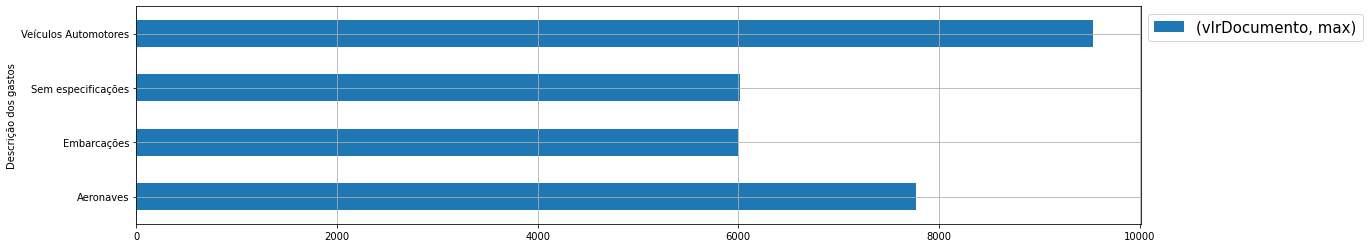

In [ ]:
grafico_comparação = Maisonerosas.plot.barh(xlabel = 'Descrição dos gastos',figsize =(18,4),fontsize = 10)
plt.legend(fontsize = 15,loc = 0, bbox_to_anchor = (1,1))
grafico_comparação.grid()

##5. Quais são os trechos de viagem mais recorrentes entre as despesas de viagem

## **Legenda dos aeroportos:**

1.BSB = BRASÍLIA                        

2.CGH = SÃO PAULO (CONGONHAS)

3.SDU = RIO DE JANEIRO(SANTOS DUMONT)

4.CNF = MINAS GERAIS (BELO HORIZONTE)

5.SSA = BAHIA (SALVADOR)

6.REC = PERNAMBUCO (RECIFE)

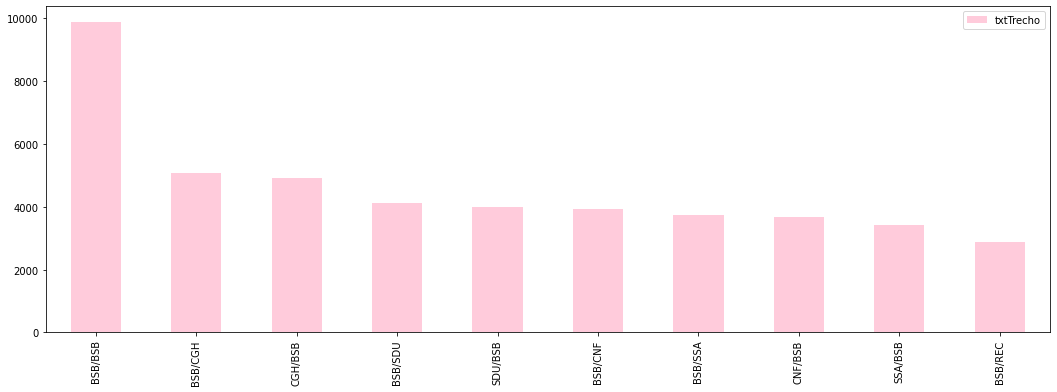

In [ ]:
trechosrecorrentes = dfparlamentarcompleto['txtTrecho'].value_counts()
dfTrechos = pd.DataFrame(trechosrecorrentes)
dfTrechos = dfTrechos.head(10)
graficotrecho = dfTrechos.plot.bar(figsize =(18,6),fontsize = 10, color = '#ffcbdb')

##6. Qual a média de gastos por estado?

In [ ]:
gastosporestado = dfparlamentarcompleto[['vlrDocumento','sgUF']]
gastosporestado

,vlrDocumento,sgUF
0,111.30,NaN
1,117.19,NaN
2,120.15,NaN
3,151.18,NaN
4,119.90,NaN
...,...,...
105600,5000.00,SP
105601,7000.00,SP
105602,4000.00,SP
105603,1.10,SP


In [ ]:
gastos_por_estado_media = gastosporestado.groupby('sgUF').agg({'vlrDocumento':['mean']}).copy()

In [ ]:
gastos_por_estado_media

,vlrDocumento
,mean
sgUF,
AC,1601.271119
AL,1473.456565
AM,1606.099154
AP,1944.971260
BA,979.921451
CE,1245.679204
DF,1553.381828
ES,936.424195


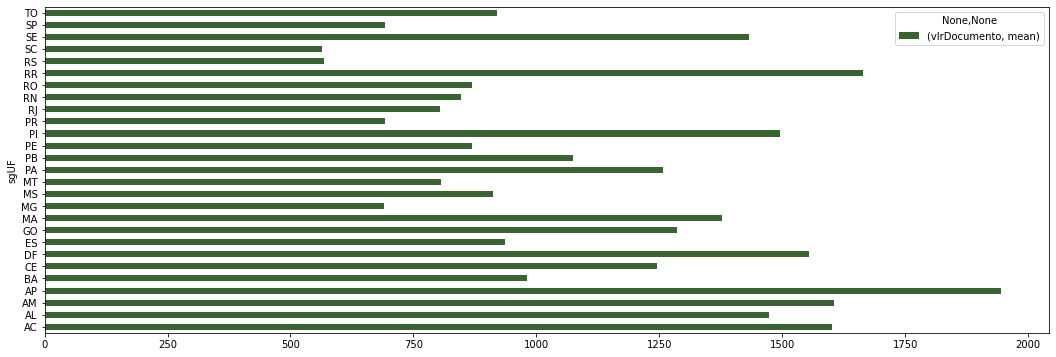

In [ ]:
dfGastos = pd.DataFrame(gastos_por_estado_media)
dfGastos = dfGastos.head(30)
graficogastos = dfGastos.plot.barh(figsize =(18,6),fontsize = 10, color = '#3a6332')


##7. Qual é o valor total de gastos por estado?

In [ ]:
parlamentar_drop_colunas = dfparlamentar.drop(columns=['ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'numParcela', 'datEmissao', 'codLegislatura', 'numEspecificacaoSubCota', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'txtPassageiro', 'numLote', 'numRessarcimento', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'])
parlamentar_drop_colunas
# Da linha 15 até a linha 878 é só liderança de partidos.

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,MA,REPUBLICANOS,999,PASSAGEM AÉREA - RPA,NaN,1930.57,0.0,1930.57,12,2019,BSB/THE,NaN
288988,Marcão Gomes,9.300886e+09,RJ,PL,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,233.00,0.0,233.00,12,2019,NaN,NaN
288989,Marcão Gomes,9.300886e+09,RJ,PL,9,PASSAGEM AÉREA - REEMBOLSO,NaN,1890.66,0.0,1890.66,12,2019,NaN,NaN
288990,Marcão Gomes,9.300886e+09,RJ,PL,10,TELEFONIA,NaN,1.19,0.0,1.19,12,2019,NaN,NaN


In [ ]:
liq_valor_positivo = parlamentar_drop_colunas[parlamentar_drop_colunas['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,111.30,0.0,111.30,1,2019,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,MA,REPUBLICANOS,999,PASSAGEM AÉREA - RPA,NaN,1930.57,0.0,1930.57,12,2019,BSB/THE,NaN
288988,Marcão Gomes,9.300886e+09,RJ,PL,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,233.00,0.0,233.00,12,2019,NaN,NaN
288989,Marcão Gomes,9.300886e+09,RJ,PL,9,PASSAGEM AÉREA - REEMBOLSO,NaN,1890.66,0.0,1890.66,12,2019,NaN,NaN
288990,Marcão Gomes,9.300886e+09,RJ,PL,10,TELEFONIA,NaN,1.19,0.0,1.19,12,2019,NaN,NaN


In [ ]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

,sgUF,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,9.128615e+14,11631635,26026263.92,103691.75,25888224.60,279273,86286003,0.0
1,MG,1.212468e+15,8134794,19880160.22,80162.70,19757003.60,215666,66112155,0.0
2,BA,5.786519e+14,6527411,18427539.72,91213.88,18295804.33,140481,43899117,0.0
3,RJ,6.676756e+14,8307993,18367765.17,83964.04,18255615.13,165271,50878800,0.0
4,RS,9.760335e+14,5007502,12889298.18,58792.66,12776985.93,159806,48451962,0.0
5,PR,6.721682e+14,5465467,12686754.96,52287.42,12619038.80,135605,41944725,0.0
6,PE,4.192607e+14,4528461,12029232.76,56000.62,11968021.58,87063,27143436,0.0
7,CE,4.040977e+14,3880983,11123089.60,40041.87,11049009.27,62631,19172424,0.0
8,PA,1.650219e+14,2934758,8572530.18,53892.29,8504242.66,47333,14918391,0.0
9,MA,3.000160e+14,2282561,8457426.50,48031.53,8398381.78,44867,13957347,0.0


In [ ]:
gasto_total_estado[['sgUF','vlrLiquido']].groupby(['sgUF']).sum().sort_values(by=['vlrLiquido'], ascending = False).reset_index()

,sgUF,vlrLiquido
0,SP,25888224.60
1,MG,19757003.60
2,BA,18295804.33
3,RJ,18255615.13
4,RS,12776985.93
5,PR,12619038.80
6,PE,11968021.58
7,CE,11049009.27
8,PA,8504242.66
9,MA,8398381.78


##8. Quais estados têm maior número de representantes? *
    OBS: CRIAR UM HEAD PRA REDUZIR AS LINHAS ATÉ 5 E GERAR GRÁFICO

In [ ]:
dfparlamentar = dfparlamentar[dfparlamentar['codLegislatura']==56]

In [ ]:
dfparlamentar = dfparlamentar.query('vlrLiquido > 0')

In [ ]:
representante_por_uf = parlamentar_drop_colunas[['txNomeParlamentar', 'sgUF']].drop_duplicates().reset_index()
representante_por_uf

,index,txNomeParlamentar,sgUF
0,0,LID.GOV-CD,NaN
1,15,LIDERANÇA DO AVANTE,NaN
2,64,LIDERANÇA DO CIDADANIA,NaN
3,114,LIDERANÇA DO DEMOCRATAS,NaN
4,124,LIDERANÇA DO NOVO,NaN
...,...,...,...
815,288595,Ricardo Pericar,RJ
816,288718,Fabiano Tolentino,MG
817,288858,Fernando Borja,MG
818,288982,Dr. Gonçalo,MA


In [ ]:
parlamentar_por_uf = representante_por_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending=False).reset_index()
parlamentar_por_uf.drop(columns = ['index'], inplace = True)
parlamentar_por_uf

,sgUF,txNomeParlamentar
0,SP,102
1,MG,81
2,RJ,80
3,BA,55
4,RS,46
5,PR,45
6,PE,37
7,CE,35
8,MA,32
9,GO,27


## 9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?

In [ ]:
representante_por_uf = parlamentar_drop_colunas[['txNomeParlamentar', 'sgUF']].drop_duplicates().reset_index()

In [ ]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

,sgUF,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,9.128615e+14,11631635,26026263.92,103691.75,25888224.60,279273,86286003,0.0
1,MG,1.212468e+15,8134794,19880160.22,80162.70,19757003.60,215666,66112155,0.0
2,BA,5.786519e+14,6527411,18427539.72,91213.88,18295804.33,140481,43899117,0.0
3,RJ,6.676756e+14,8307993,18367765.17,83964.04,18255615.13,165271,50878800,0.0
4,RS,9.760335e+14,5007502,12889298.18,58792.66,12776985.93,159806,48451962,0.0
5,PR,6.721682e+14,5465467,12686754.96,52287.42,12619038.80,135605,41944725,0.0
6,PE,4.192607e+14,4528461,12029232.76,56000.62,11968021.58,87063,27143436,0.0
7,CE,4.040977e+14,3880983,11123089.60,40041.87,11049009.27,62631,19172424,0.0
8,PA,1.650219e+14,2934758,8572530.18,53892.29,8504242.66,47333,14918391,0.0
9,MA,3.000160e+14,2282561,8457426.50,48031.53,8398381.78,44867,13957347,0.0


In [ ]:
parlamentar_por_uf = representante_por_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending=False).reset_index()
parlamentar_por_uf.drop(columns = ['index'], inplace = True)
parlamentar_por_uf

,sgUF,txNomeParlamentar
0,SP,102
1,MG,81
2,RJ,80
3,BA,55
4,RS,46
5,PR,45
6,PE,37
7,CE,35
8,MA,32
9,GO,27


In [ ]:
parl_liq_estado = pd.merge(parlamentar_por_uf, gasto_total_estado, on = 'sgUF')
parl_liq_estado

,sgUF,txNomeParlamentar,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,102,9.128615e+14,11631635,26026263.92,103691.75,25888224.60,279273,86286003,0.0
1,MG,81,1.212468e+15,8134794,19880160.22,80162.70,19757003.60,215666,66112155,0.0
2,RJ,80,6.676756e+14,8307993,18367765.17,83964.04,18255615.13,165271,50878800,0.0
3,BA,55,5.786519e+14,6527411,18427539.72,91213.88,18295804.33,140481,43899117,0.0
4,RS,46,9.760335e+14,5007502,12889298.18,58792.66,12776985.93,159806,48451962,0.0
5,PR,45,6.721682e+14,5465467,12686754.96,52287.42,12619038.80,135605,41944725,0.0
6,PE,37,4.192607e+14,4528461,12029232.76,56000.62,11968021.58,87063,27143436,0.0
7,CE,35,4.040977e+14,3880983,11123089.60,40041.87,11049009.27,62631,19172424,0.0
8,MA,32,3.000160e+14,2282561,8457426.50,48031.53,8398381.78,44867,13957347,0.0
9,GO,27,1.428685e+14,274576,5939460.82,24464.39,5898477.12,36809,10684548,0.0


In [ ]:
#Normalização em dataframe
scaler_01 = MinMaxScaler() 

dados_normalizados = scaler_01.fit_transform(parl_liq_estado[['txNomeParlamentar', 'vlrLiquido']])
dados_normalizados

array([[1.        , 1.        ],
       [0.76666667, 0.7454779 ],
       [0.75555556, 0.68315156],
       [0.47777778, 0.68481991],
       [0.37777778, 0.45572015],
       [0.36666667, 0.44916337],
       [0.27777778, 0.42213804],
       [0.25555556, 0.38398758],
       [0.22222222, 0.27395349],
       [0.16666667, 0.17017629],
       [0.16666667, 0.15238649],
       [0.15555556, 0.27834804],
       [0.06666667, 0.16075991],
       [0.04444444, 0.05214604],
       [0.04444444, 0.0734064 ],
       [0.03333333, 0.05518619],
       [0.03333333, 0.1230362 ],
       [0.02222222, 0.10335995],
       [0.02222222, 0.09867992],
       [0.02222222, 0.        ],
       [0.02222222, 0.09565435],
       [0.02222222, 0.09482088],
       [0.01111111, 0.05516436],
       [0.        , 0.07656177],
       [0.        , 0.0957829 ],
       [0.        , 0.08146111],
       [0.        , 0.07256497]])

In [ ]:
#Normalização em dataframe
dados_normalizados2 = pd.DataFrame(dados_normalizados)

dados_normalizados2.rename(columns={0:'Numero_de_representantes_uf', 1:'Total_de_Gastos'}, inplace=True)

dados_normalizados2

,Numero_de_representantes_uf,Total_de_Gastos
0,1.000000,1.000000
1,0.766667,0.745478
2,0.755556,0.683152
3,0.477778,0.684820
4,0.377778,0.455720
5,0.366667,0.449163
6,0.277778,0.422138
7,0.255556,0.383988
8,0.222222,0.273953
9,0.166667,0.170176


In [ ]:
# Exibindo correlação muito alta já que 1 e 0,98 estão positivamente muito próximas. 
dados_normalizados_var = dados_normalizados2.corr()
dados_normalizados_var

,Numero_de_representantes_uf,Total_de_Gastos
Numero_de_representantes_uf,1.000000,0.975439
Total_de_Gastos,0.975439,1.000000


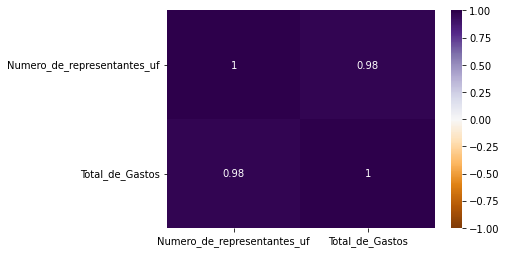

In [ ]:
sns.heatmap(dados_normalizados_var, 
        xticklabels= dados_normalizados_var.columns,
        yticklabels= dados_normalizados_var.columns, annot=True, cmap="PuOr", vmin=-1, vmax=1)
print()


# Questão 10

In [ ]:
custosTodosPartidos = dfparlamentarcompleto[['sgPartido','vlrDocumento','sgUF','cpf']].dropna()
custoMedioPartidos = custosTodosPartidos.groupby("sgPartido").mean().reset_index().sort_values('vlrDocumento')
custoMedioPartidos

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sgPartido", y="vlrDocumento",data=custoMedioPartidos)
ax.figure.set_size_inches(18,6)
plt.xticks(rotation = 90)
ax.set_xlabel("Partidos", fontsize = 20)
ax.set_ylabel("Despesas(milhares de R$)", fontsize = 20)
ax.set(title = "Custo médio por partido")


NameError: ignored

In [ ]:
x = dfparlamentarcompleto[['sgPartido','vlrDocumento','sgUF']].dropna().groupby('sgPartido').sum().sort_values(by='vlrDocumento',ascending = False)
x

# Questão 11

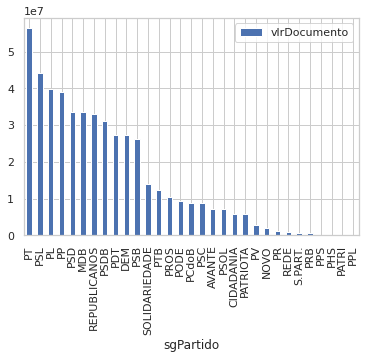

In [ ]:
x.plot(kind='bar')

# Questão 12

In [ ]:
gastos_uftotal = dfparlamentarcompleto[['sgPartido' , 'vlrLiquido']].groupby('sgPartido').sum().sort_values('vlrLiquido', ascending = False).round(2)

gastos_uftotal.rename(columns = {'vlrLiquido':'Valor_Total'}, inplace = True)

gastos_uftotal = gastos_uftotal.reset_index()

parlamentares_uf = dfparlamentarcompleto[['txNomeParlamentar', 'sgPartido']].drop_duplicates()

parlamentares_uf = parlamentares_uf.groupby('sgPartido').count().sort_values('txNomeParlamentar', ascending = False)

parlamentares_uf.rename(columns = {'txNomeParlamentar':'Quantidade De Representantes'}, inplace = True)

parlamentares_uf = parlamentares_uf.reset_index()

maximo = parlamentares_uf['Quantidade De Representantes'].max()

In [ ]:
y = np.array(gastos_uftotal['Valor_Total']/1000000)
x = np.array(gastos_uftotal.sgPartido)
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.xticks(gastos_uftotal.index, rotation = 90)
plt.grid(axis= 'y')
plt.bar(x,y)
plt.title('Despesas em Milhões de Reais por Partido')

NameError: ignored

In [ ]:
x = np.array(parlamentares_uf.sgPartido)
y = np.array(parlamentares_uf['Quantidade De Representantes'])
plt.figure(figsize=(20,7))
plt.subplot(1,2,2)
plt.xticks(parlamentares_uf.index, rotation = 90)
plt.bar(x,y)
plt.grid(axis= 'x')
plt.title('Número de Deputado por Partido')
plt.show()

## 13. A média total de gastos parlamentares durante o período analisado##


In [ ]:
media_parlamentares = dfparlamentarcompleto['vlrDocumento'].mean()
media_parlamentares

884.4121722591002

A média total de gastos parlamentares entre 2019 e 2021 foi de 
R$884.4121722591002. 

##14. O partido que mais teve gastos em viagens##


In [ ]:
maiorGastoViagens = dfparlamentarcompleto.groupby('sgPartido')['vlrDocumento'].sum().sort_values(ascending=False).head(5).copy()
maiorGastoViagens


sgPartido
PT     56775386.28
PSL    44076496.14
PL     39694324.59
PP     39016501.64
PSD    33797569.35
Name: vlrDocumento, dtype: float64

<BarContainer object of 5 artists>

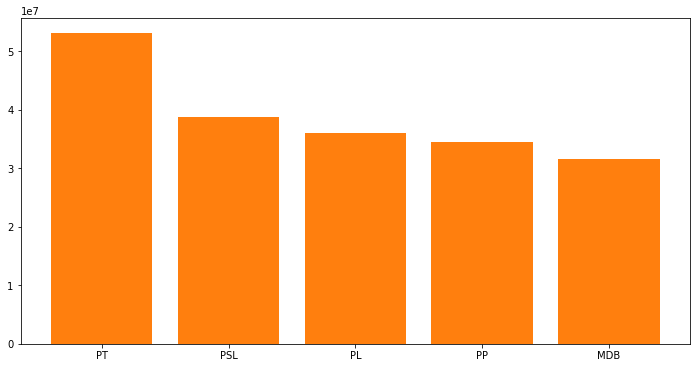

In [ ]:
partidos = maiorGastoViagens.filter('sgPartido')
despesas = maiorGastoViagens.filter('vlrDocumento')
plt.figure(figsize=(12,6))
plt.bar(partidos,despesas)

sg_Partidos = ['PT', 'PSL', 'PL' , 'PP', 'MDB']
vlr_Liquido = [ 53101273.58, 38739174.80, 36009565.01, 34429101.14, 31505872.66]
plt.bar(sg_Partidos, vlr_Liquido)

O partido que mais teve gastos com viagens foi o Partido dos Trabalhadores (PT).

O gráfico de barras permite visualizar os cinco partidos que mais gastaram com viagens.


## 15. Qual é a média de gastos com viagens por partido?

In [ ]:
maiorMediaGastopartido = dfparlamentarcompleto.groupby('sgPartido')['vlrDocumento'].mean().sort_values(ascending=False).copy
maiorMediaGastopartido

<bound method NDFrame.copy of sgPartido
PROGRESSISTAS    6487.500000
SOCIAL           2464.794510
PPL              2246.287500
S.PART.          1765.374536
PHS              1295.671871
REDE             1272.739110
PSC              1243.426114
PROS             1218.871228
PCdoB            1211.213360
PRB              1187.840038
REPUBLICANOS     1134.405176
SOLIDARIEDADE    1125.774747
PR               1094.883131
PATRI            1064.531558
PL               1031.155334
DEM              1007.092766
PPS               974.337378
PATRIOTA          965.061895
PDT               963.666410
PTB               957.273905
PSD               920.237682
PSDB              904.028313
DEMOCRATAS        895.260933
PODE              891.194019
PP                885.531131
PSOL              875.868618
MDB               870.816122
PT                793.805996
PODEMOS           791.693429
PV                778.960601
AVANTE            773.953576
PSB               752.966990
PSL               657.298957
CID

In [ ]:
maiorMediaGastopartido = dfparlamentarcompleto.groupby(['sgPartido']).agg({'vlrDocumento':['mean']}).copy()
maiorMediaGastopartido

,vlrDocumento
,mean
sgPartido,
AVANTE,773.953576
CIDADANIA,619.836462
DEM,1007.092766
DEMOCRATAS,895.260933
MDB,870.816122
NOVO,328.983135
PATRI,1064.531558
PATRIOTA,965.061895


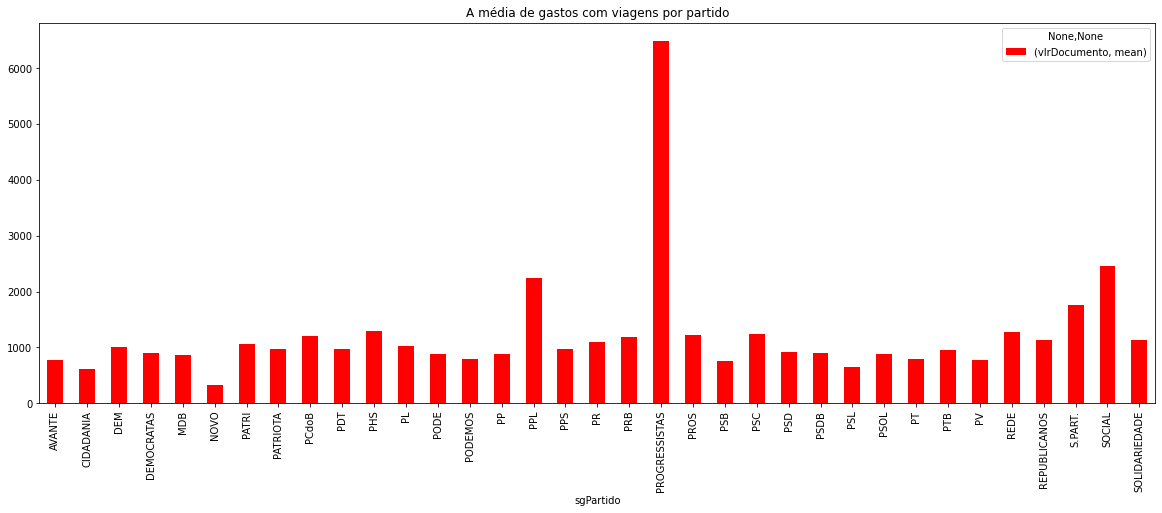

In [ ]:
maiorMediaGastopartido.plot(kind='bar', figsize=(20,7), title= 'A média de gastos com viagens por partido', color="red")

A média de gastos com viagens por partido pode ser analisada a partir do gráfio de barras. 

O partido Progressistas possui a maior média de gastos com viagens, enquanto o Partido Novo apresenta a menor.